**1. Importing libraries**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from osclib import osclibrary as osc

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

**2. Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [2]:
xraypath = '/path/to/Henke/data/'

**Examples**

**DNA**

In [7]:
A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]

osc_drude = osc.Drude(omega, A, gamma, xraypath = xraypath)
osc_drude.name = 'DNA'
osc_drude.composition = osc.Composition(['c','n','o','p','h'], [39,13,24,4,49])
osc_drude.alpha = 0
osc_drude.eloss = osc.linspace(osc.machine_eps,100,0.1)
osc_drude.q = 0
osc_drude.Eg = 4.5
osc_drude.vb = 0.5
osc_drude.na = 0.087

*Calculate and plot ELF*

<IPython.core.display.Javascript object>


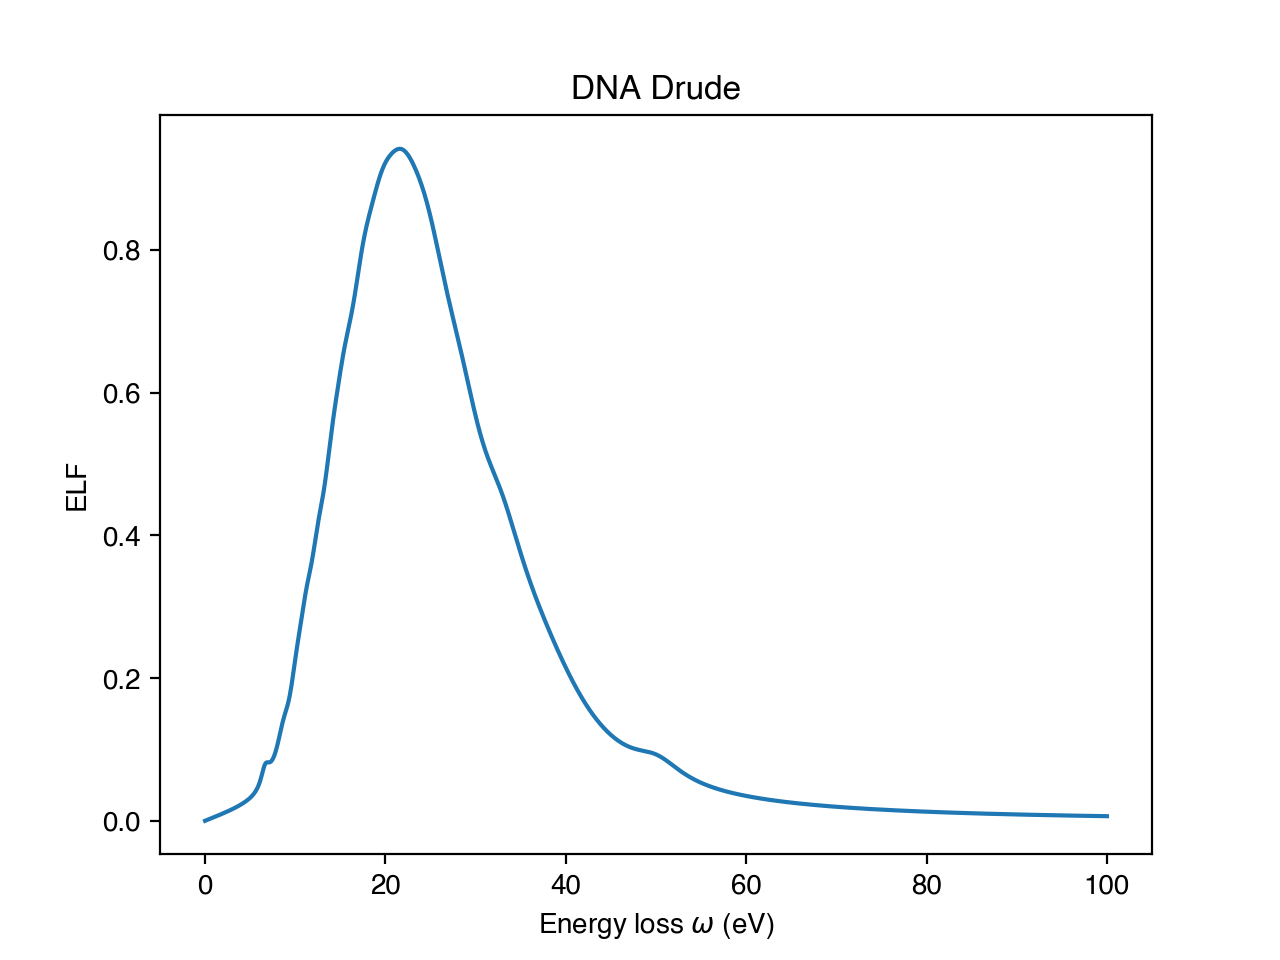

In [18]:
inelastic = osc.InelasticProperies(osc_drude)
inelastic.plotELF()

*Calculate and plot normalised DIIMFP*

<IPython.core.display.Javascript object>


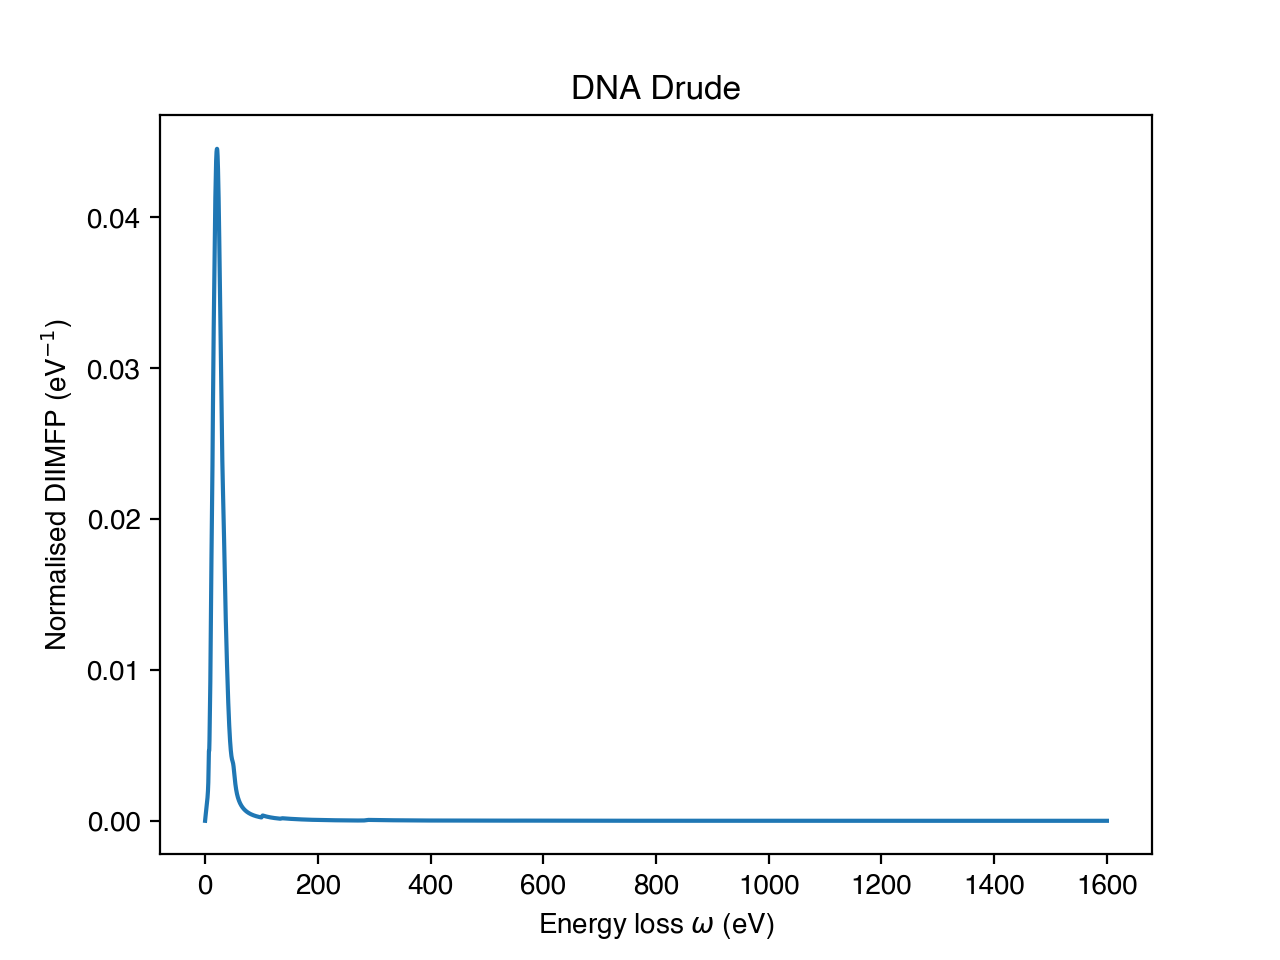

In [19]:
E0 = 1600
inelastic.plotDIIMFP(E0, normalised=True)

*Calculate and plot IMFP*

<IPython.core.display.Javascript object>


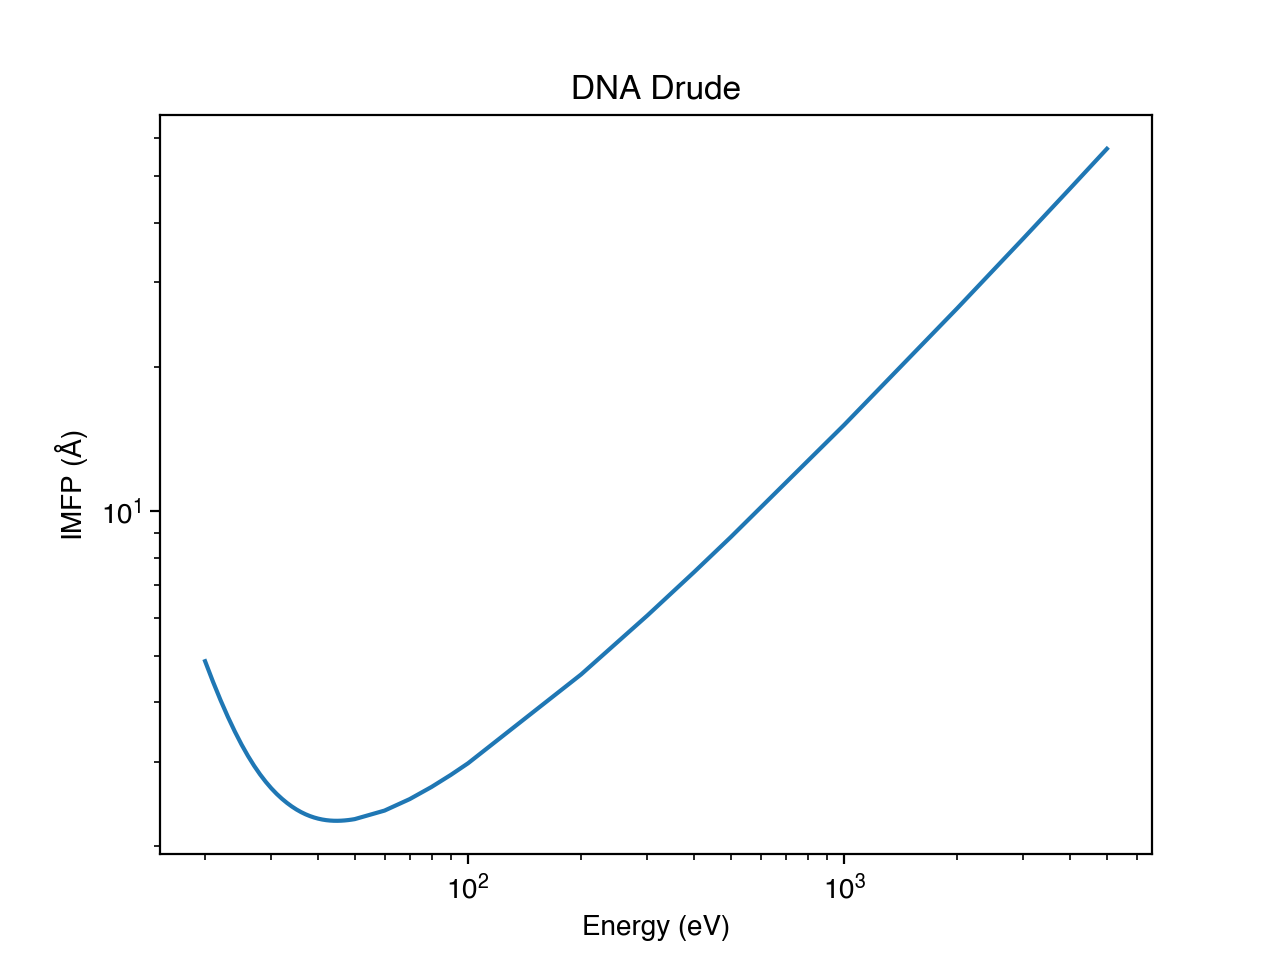

In [20]:
E0 = np.hstack((osc.linspace(20,50),osc.linspace(60,100,10),osc.linspace(200,500,100),osc.linspace(1000,5000,1000)))
inelastic.plotIMFP(E0)

*Calculate optical constants*

<IPython.core.display.Javascript object>


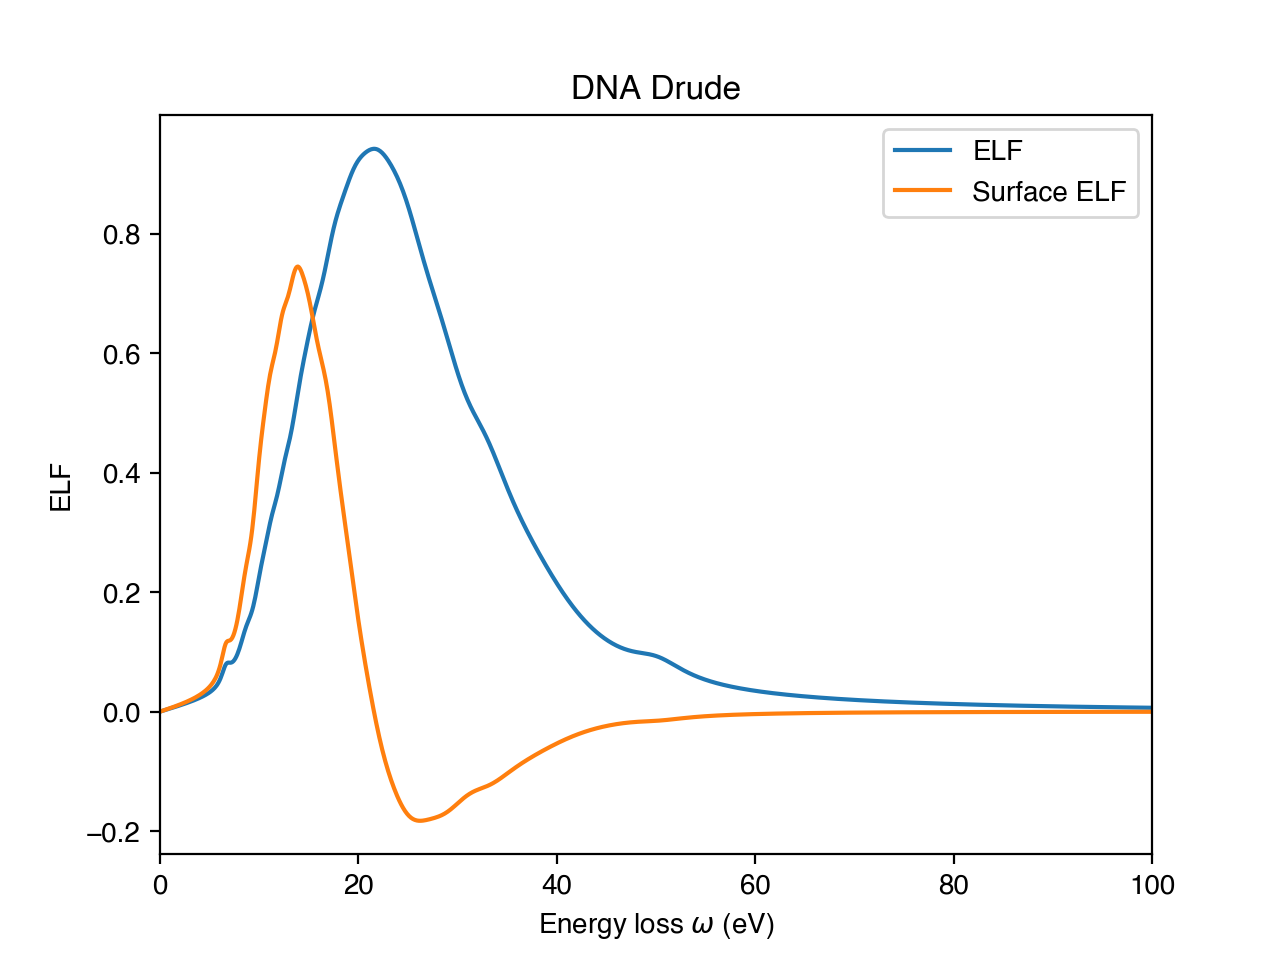

In [21]:
osc_drude.calculateDielectricFunction()
n_complex = np.sqrt(osc_drude.epsilon)
n = n_complex.real
k = n_complex.imag

eps_1 = osc_drude.epsilon.real
eps_2 = osc_drude.epsilon.imag
den = (eps_1**2 + eps_1 - eps_2**2)**2 + (2*eps_1*eps_2 + eps_2)**2
enu = -eps_2*(2*eps_1 + 1)*((eps_1 - 1)**2 - eps_2**2)
enu += 2*eps_2*(eps_1 - 1)*(eps_1*(eps_1 + 1) - eps_2**2)
surf_elf = enu/den

plt.figure()
# plt.plot(osc_drude.eloss,eps_1,label='$\epsilon_1$')
# plt.plot(osc_drude.eloss,eps_2,label='$\epsilon_2$')
plt.plot(osc_drude.eloss,(-1/osc_drude.epsilon).imag,label='ELF')
plt.plot(osc_drude.eloss,surf_elf,label='Surface ELF')

plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{osc_drude.name} {osc_drude.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


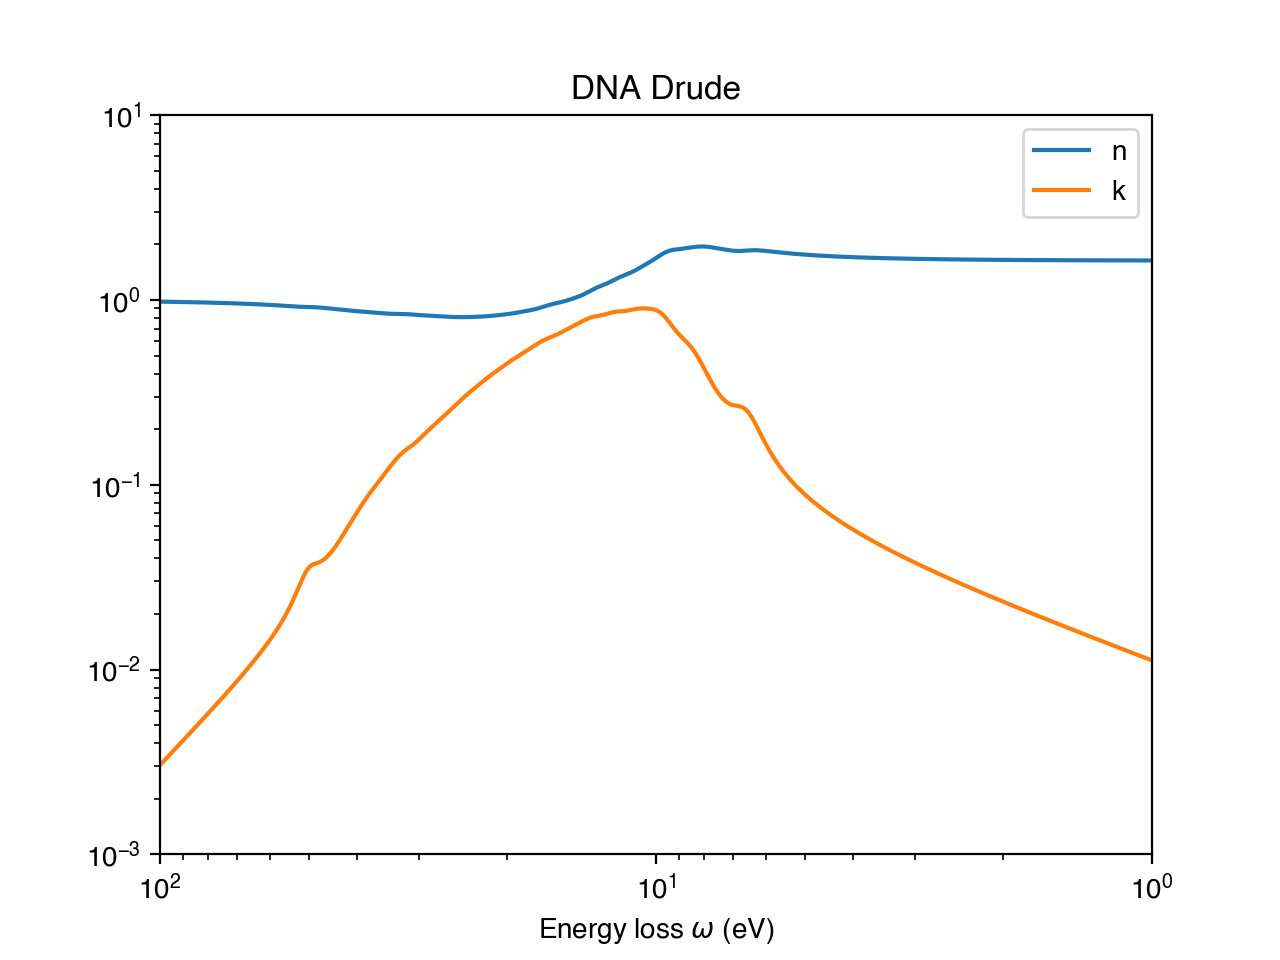

In [22]:
plt.figure()
plt.plot(osc_drude.eloss,n,label='n')
plt.plot(osc_drude.eloss,k,label='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.legend()
plt.title(f'{osc_drude.name} {osc_drude.model}')
plt.show()

*Drude-Lindhard*

In [13]:
A = [0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017]
gamma = [3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91]
omega = [11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97]

osc_dl = osc.DrudeLindhard(omega, A, gamma, xraypath = xraypath)
osc_dl.name = 'DNA'
osc_dl.composition = osc.Composition(['c','n','o','p','h'], [39,13,24,4,49])
osc_dl.alpha = 0
osc_dl.eloss = osc.linspace(osc.machine_eps,100,0.1)
osc_dl.q = 0
osc_dl.Eg = 4.5
osc_dl.vb = 0.5
osc_dl.na = 0.087

<IPython.core.display.Javascript object>


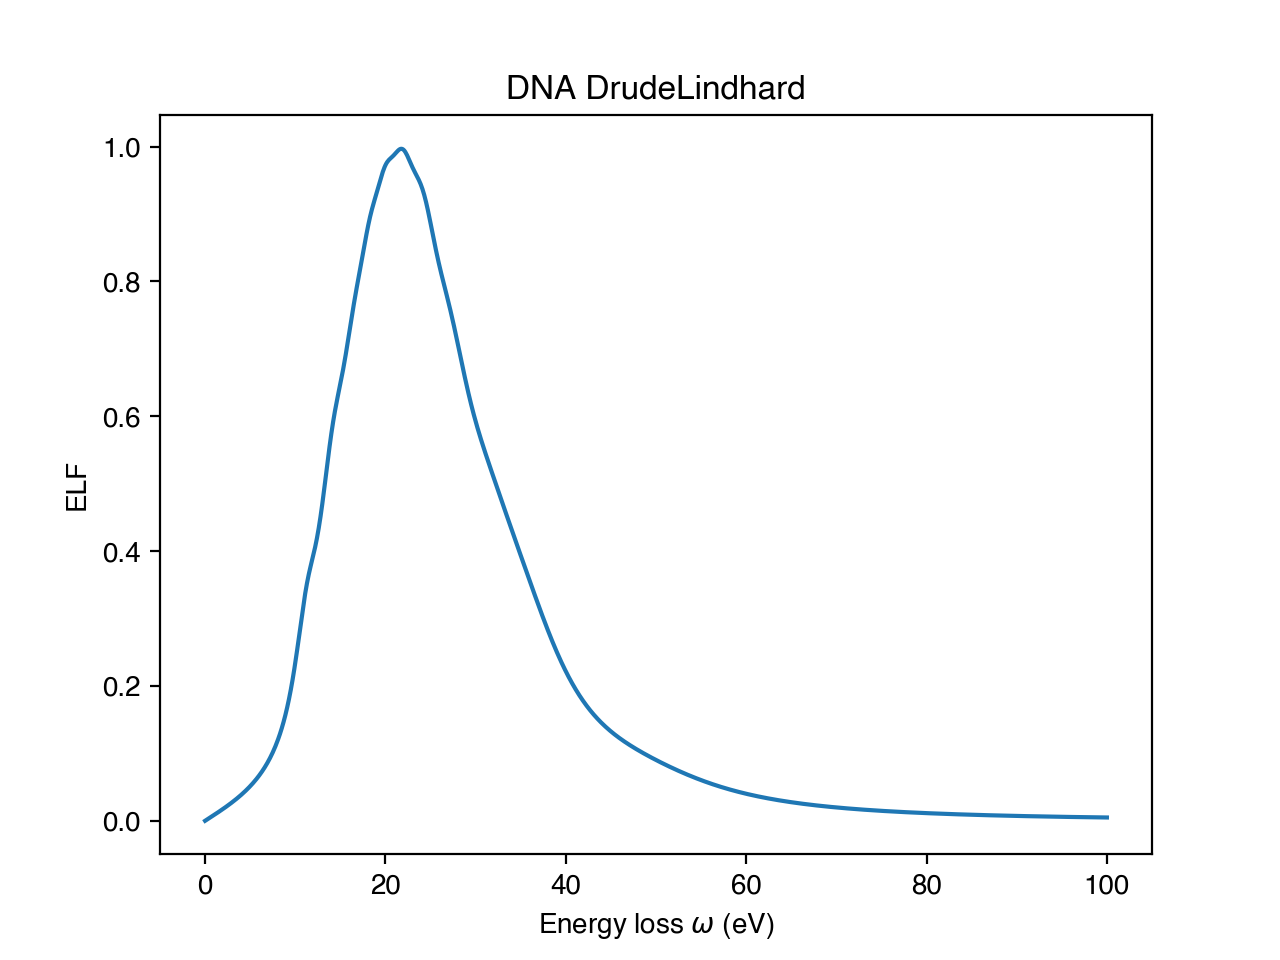

In [14]:
inelastic_dl = osc.InelasticProperies(osc_dl)
inelastic_dl.plotELF()

<IPython.core.display.Javascript object>


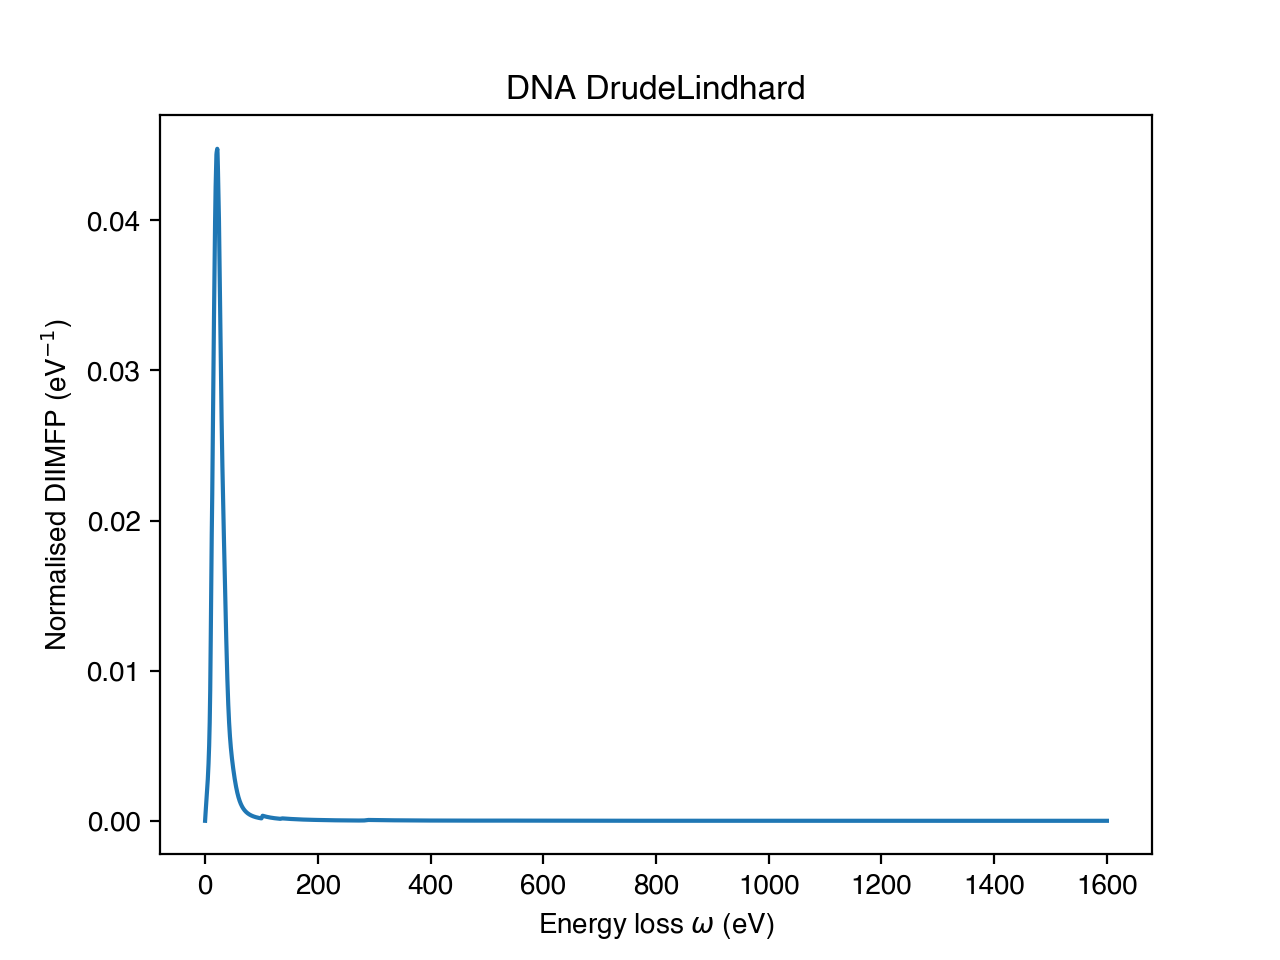

In [15]:
E0 = 1600
inelastic_dl.plotDIIMFP(E0)

<IPython.core.display.Javascript object>


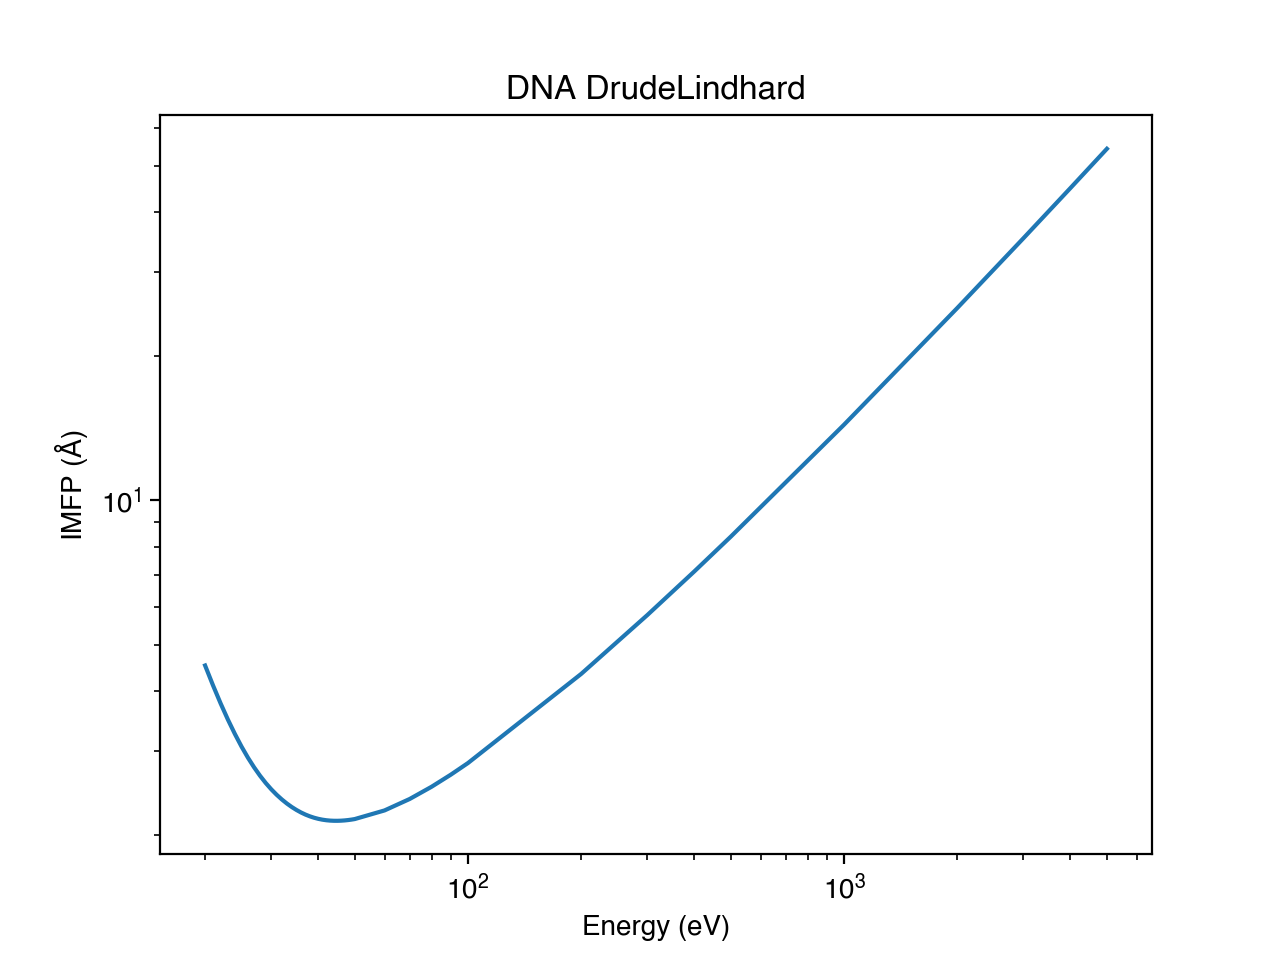

In [16]:
E0 = np.hstack((osc.linspace(20,50),osc.linspace(60,100,10),osc.linspace(200,500,100),osc.linspace(1000,5000,1000)))
inelastic_dl.plotIMFP(E0)

**Au**

In [3]:
A = [0.01, 0.02, 0.07, 0.1, 0.07,0.007, 0.16, 0.15,0.13,0.08,0.02,0.09,0.16,0.02,0.003,0.005,0.008]
omega = [2.62,3.34,6.31,10.58,17.08,25.75,25.39,33.65,39.17,45.72,52.12,14.57,64.21,96.19,278.92,210.69,470.93]
gamma = [0.29,0.81,3.05,5.62,5.04,2.05,8.04,8.56,10.86,10.79,11.13,5.39,29.85,34.51,38.38,62.79,376.54]

osc_dl = osc.DrudeLindhard(omega, A, gamma, xraypath = xraypath)
osc_dl.name = 'Au'
osc_dl.composition = osc.Composition('au', 1)
osc_dl.alpha = 1
osc_dl.eloss = osc.linspace(osc.machine_eps,100,0.1)
osc_dl.q = 0
osc_dl.Ef = 9
osc_dl.na = 0.059

<IPython.core.display.Javascript object>


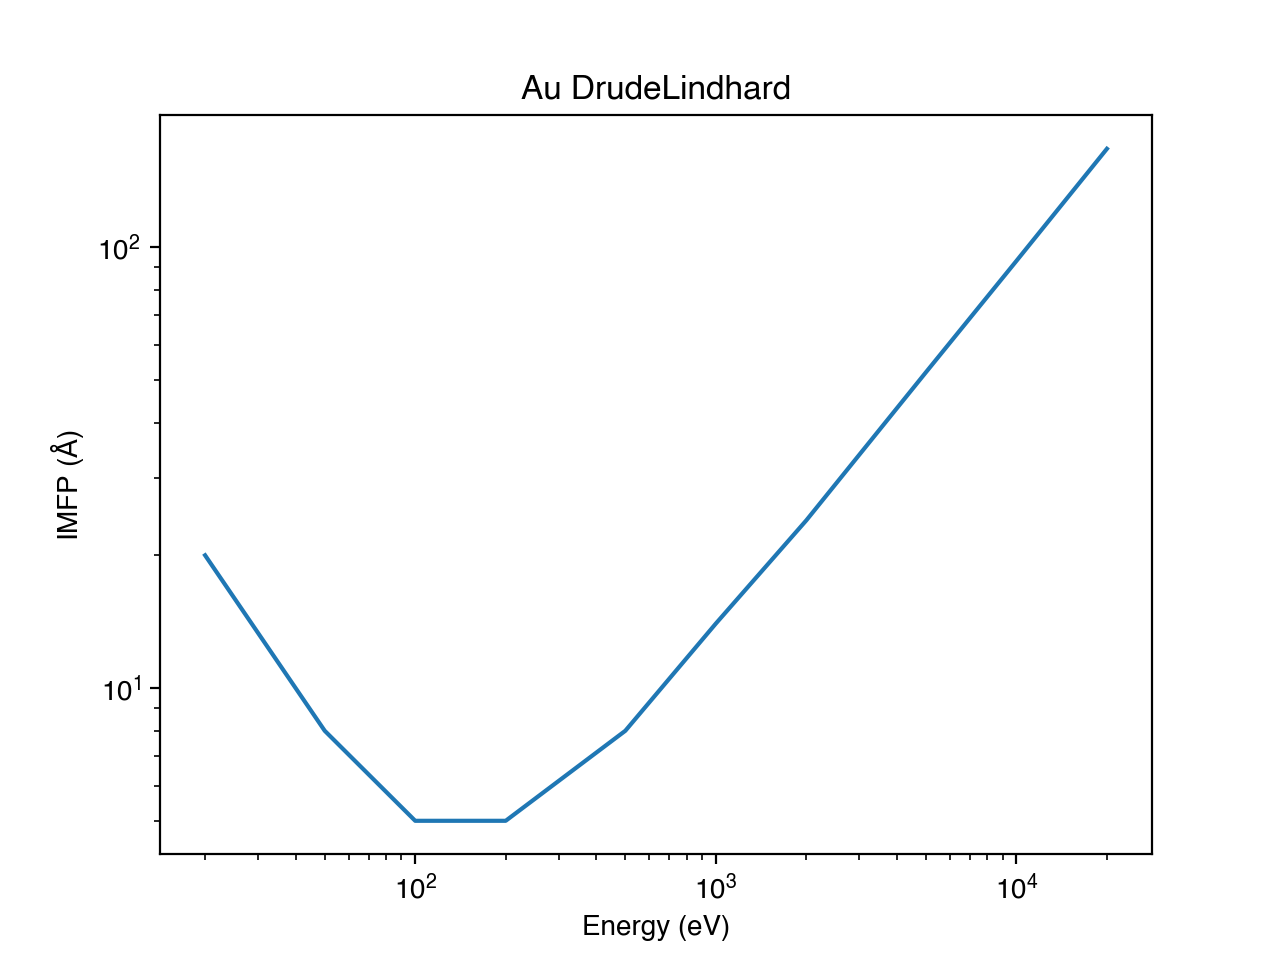

In [5]:
E0 = np.array([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]) # eV

inelastic_dl = osc.InelasticProperies(osc_dl)
inelastic_dl.plotIMFP(E0)